In [15]:
import pyro
import torch
import pyro.distributions as dist
import networkx as nx
from IPython.display import Image, display


# Exercise 1

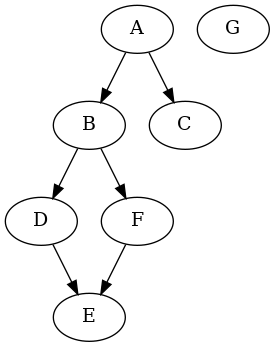

In [18]:
def plot_ctmc(labels, transition_matrix):
    
    def get_label(my_dict,val):
        for key, value in my_dict.items():
            if val == value:
                return key
    
    n=len(transition_matrix)
    G = nx.MultiDiGraph()
    G.add_nodes_from(labels.keys())
    for i in range(n):
        for j in range(n):
            if transition_matrix[i,j]>0:
                G.add_edge(get_label(labels,i),get_label(labels,j),weight=transition_matrix[i,j]) 
    pdot=nx.drawing.nx_pydot.to_pydot(G)
    plt = Image(pdot.create_png())
    display(plt)

labels={"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6} 
matrix=torch.zeros(7,7)
matrix[0,1]=1
matrix[1,5]=1
matrix[0,2]=1
matrix[1,3]=1
matrix[3,4]=1
matrix[5,4]=1


plot_ctmc(labels,matrix)

a.) False, because they are head to tail in $B$.

b.) False, because they are tail to tail in $B$.

c.) False, in fact $$p(A,B|C)=\frac{p(A,B,C)}{p(C)}=\frac{p(A|B)p(C|A)p(A)}{p(C)}=p(A|C)P(B|A)\neq P(A|C)P(B|C)$$

d.) Yes, because they are tail to tail in $B$

e.) No, because they are head to head in $E$

f.)No, in fact $p(B,E|F)=\sum\limits_{D} \frac{P(B)P(D|B)P(F|B)P(E|D)P(E|F)}{P(F)}=P(E|F)P(B|F)\sum\limits_{D} P(E|D)P(D|B)\neq P(E|F)P(B|F)$


g.) Yes

Proof:

$P(A,D|B,F)=\frac{P(A)P(B|A)P(F|B)P(D|B)}{P(B,F)}=\frac{P(A)P(B|A)P(F|B)P(D|B)}{P(F|B)P(B)}=\frac{P(A)P(B|A)P(D|B)}{P(B)}=P(A|B)P(D|B)$. 

Also $P(A|B,F)=\frac{P(A)P(B|A)P(F|B)}{P(B,F)}=\frac{P(A)P(B|A)}{P(B)}=P(A|B)$

Also $P(D|B,F)=\frac{P(B)P(D|B)P(F|B)}{P(F,B)}=P(D|B)$

Substitung we arrive at $P(A,D|B,F)=P(A|B,F)P(D|B,F)$

# Exercise 2

The generative model is
$$ [\prod\limits_{j=1}^{N}\prod\limits_{i=1}^{S}P(u_{ij}|r_{i},\pi_{j})][\prod\limits_{j=1}^{N}P(\pi_{j}|\beta_{\pi},\alpha_{\pi})][\prod_{i=1}^{S}P(r_{i}|p)]P(p|\alpha_{p},\beta_{p})$$

In [12]:
alpha_p=1
beta_p=1
alpha_pi=1
beta_pi=0.5


def model(data):
    N = len(data[0,:])
    S= len(data[:,0])
    p=pyro.sample('p',dist.Beta(alpha_p,beta_p))
    
    platepi=pyro.plate('piplate',N,dim=-1)
    plater=pyro.plate('rplate',S, dim=-2)
    
    with platepi:
        pi=pyro.sample('pi',dist.Beta(alpha_pi,beta_pi))
        
    with plater:
        r=pyro.sample('r',dist.Bernoulli(p))
        
    with platepi, plater:
        u=pyro.sample('u',dist.Bernoulli(r*(1-pi)+(1-r)*pi),obs=data)
    return pi,r,u
    
        
        
data=dist.Bernoulli(0.6).sample((12,6))

pi,r,u=model(data)
print(u)


tensor([[1., 1., 0., 0., 1., 0.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [1., 0., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0., 1.],
        [1., 0., 0., 0., 1., 1.],
        [1., 1., 0., 1., 1., 0.],
        [1., 0., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1., 1.]])
